In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('play_tennis.csv')

In [3]:
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [4]:
df.shape

(14, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       14 non-null     object
 1   outlook   14 non-null     object
 2   temp      14 non-null     object
 3   humidity  14 non-null     object
 4   wind      14 non-null     object
 5   play      14 non-null     object
dtypes: object(6)
memory usage: 804.0+ bytes


In [9]:
df.describe()

,day,outlook,temp,humidity,wind,play
count,14,14,14,14,14,14
unique,14,3,3,2,2,2
top,D1,Sunny,Mild,High,Weak,Yes
freq,1,5,6,7,8,9


In [7]:
df.isnull()

,day,outlook,temp,humidity,wind,play
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [10]:
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [12]:
df['play'].value_counts()

play
Yes    9
No     5
Name: count, dtype: int64

In [13]:
df['play'].unique()

array(['No', 'Yes'], dtype=object)

# Approach 1 Label Encoding

In [14]:
df_encoded=pd.DataFrame()
df_encoded

""


In [18]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [19]:
for col in df.columns:
    df_encoded[col]=le.fit_transform(df[col])

In [20]:
df_encoded

,day,outlook,temp,humidity,wind,play
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1
5,10,1,0,1,0,0
6,11,0,0,1,0,1
7,12,2,2,0,1,0
8,13,2,0,1,1,1
9,1,1,2,1,1,1


In [24]:
X=df_encoded.iloc[:,0:5]
X

,day,outlook,temp,humidity,wind
0,0,2,1,0,1
1,6,2,1,0,0
2,7,0,1,0,1
3,8,1,2,0,1
4,9,1,0,1,1
5,10,1,0,1,0
6,11,0,0,1,0
7,12,2,2,0,1
8,13,2,0,1,1
9,1,1,2,1,1


In [25]:
y=df_encoded.iloc[:,-1]
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int32

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf=LogisticRegression()

In [28]:
clf.fit(X,y)

LogisticRegression()

In [29]:
clf.score(X,y)

0.8571428571428571

In [30]:
12/14 # 2 miss classifications

0.8571428571428571

# Approach 2 One-Hot Encoding

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
oe=OneHotEncoder(sparse_output=False)

In [47]:
column_list=['outlook','temp','humidity','wind']

In [48]:
encoded=oe.fit_transform(df[column_list])

In [49]:
encoded

array([[0., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 1., 1., 0.],
       [1., 0., 0., 0., 0., 1., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0., 1., 1., 0., 1., 0.]])

In [54]:
X=pd.DataFrame(encoded,columns=oe.get_feature_names_out(column_list))         #type casted array-to-DataFrame
X

,outlook_Overcast,outlook_Rain,outlook_Sunny,temp_Cool,temp_Hot,temp_Mild,humidity_High,humidity_Normal,wind_Strong,wind_Weak
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
7,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
8,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [55]:
clf2=LogisticRegression()
clf2.fit(X,y)

LogisticRegression()

In [56]:
clf2.score(X,y)

0.8571428571428571

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
cm=confusion_matrix(y,clf2.predict(X))

In [59]:
cm

array([[3, 2],
       [0, 9]], dtype=int64)

<Axes: >

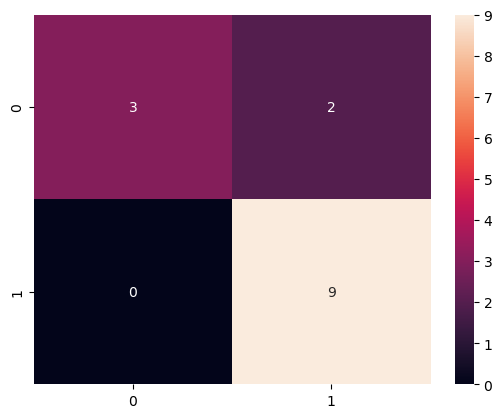

In [60]:
import seaborn as sns
sns.heatmap(cm,annot=True)